In [18]:
from MyScienceTools.modules import *

Successfully auto read MyScienceTools\spectrum\QE\QE_R6233_RL0840.csv using separator '	', data shape is (41, 2)


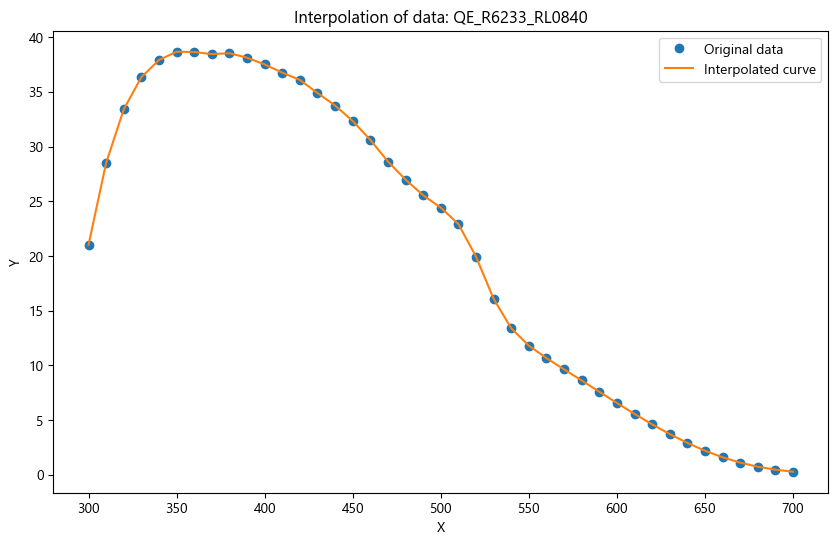

Successfully auto read MyScienceTools\spectrum\QE\QE_S3590.csv using separator ',', data shape is (1000, 2)


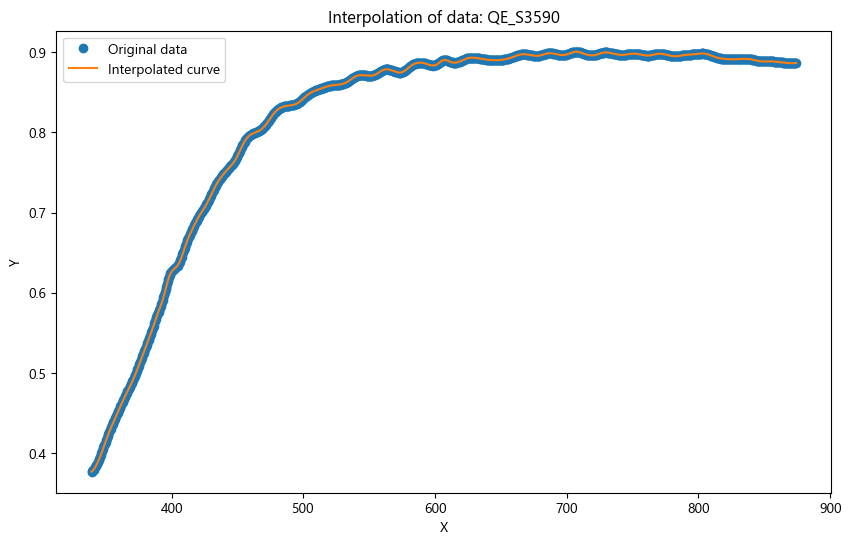

Successfully auto read MyScienceTools\spectrum\scintillator_实测\Em_GAGG.txt using separator ',', data shape is (71, 3)


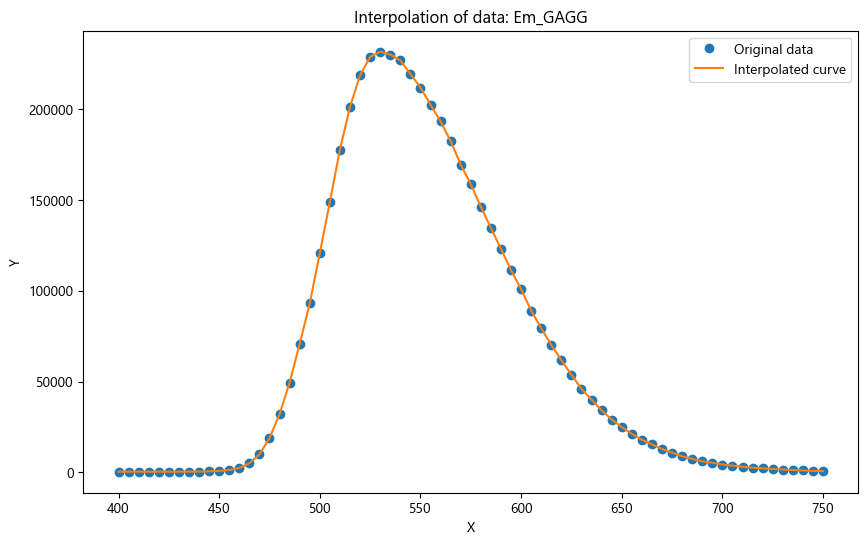

Successfully auto read MyScienceTools\spectrum\scintillator_实测\Em_BGO777.txt using separator ',', data shape is (251, 3)


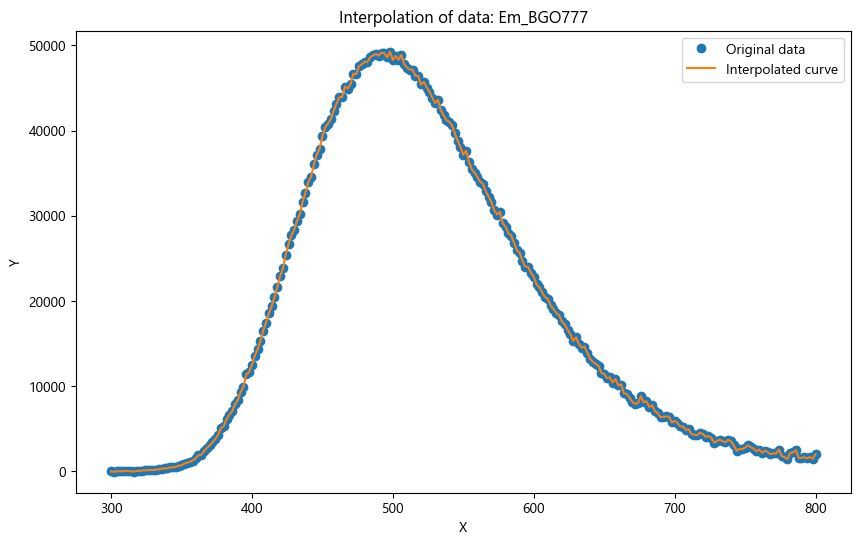

Successfully auto read MyScienceTools\spectrum\scintillator_web\Em_CsI(Tl)_web.txt using separator ',', data shape is (136, 2)


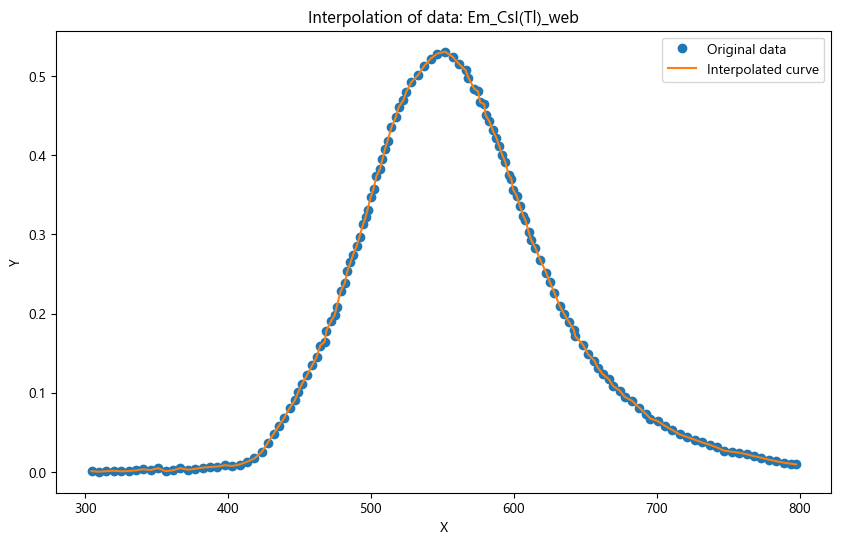

Successfully auto read MyScienceTools\spectrum\scintillator_实测\Em_CsI.txt using separator ',', data shape is (261, 3)


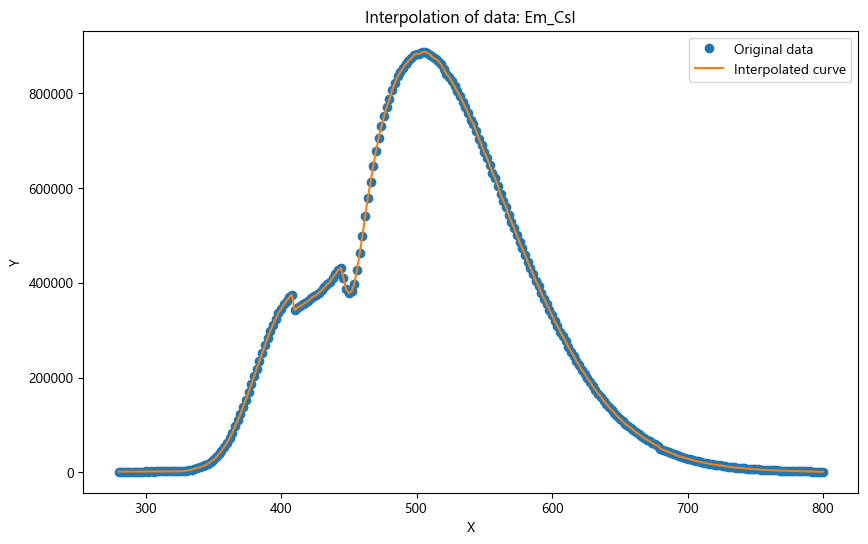

Successfully auto read MyScienceTools\spectrum\scintillator_web\Em_NaI(Tl)_web.txt using separator ',', data shape is (40, 2)


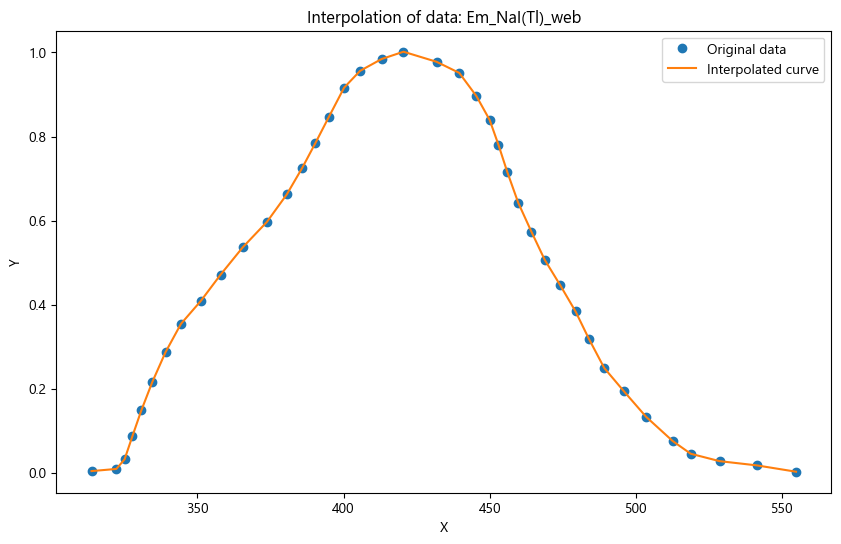

Successfully auto read MyScienceTools\spectrum\scintillator_web\Em_LYSO_web.txt using separator ',', data shape is (68, 2)


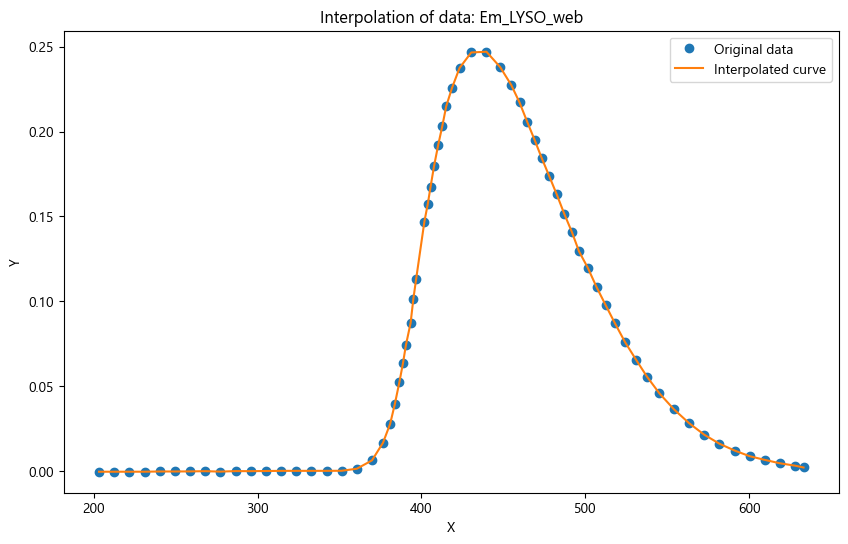

In [47]:
fileName = r'MyScienceTools\spectrum\QE\QE_R6233_RL0840.csv'
QE_R6233 = myInterpolation(ReadData(fileName),plot=True,smooth_window=1).process()

fileName = r'MyScienceTools\spectrum\QE\QE_S3590.csv'
QE_S359008 = myInterpolation(ReadData(fileName),plot=True,smooth_window=1).process()

fileName = r'MyScienceTools\spectrum\scintillator_实测\Em_GAGG.txt'
EM_GAGG = myInterpolation(ReadData(fileName),plot=True,smooth_window=1).process()

fileName = r'MyScienceTools\spectrum\scintillator_实测\Em_BGO777.txt'
EM_BGO = myInterpolation(ReadData(fileName),plot=True,smooth_window=1).process()

fileName = r'MyScienceTools\spectrum\scintillator_web\Em_CsI(Tl)_web.txt'
EM_CsI = myInterpolation(ReadData(fileName),plot=True,smooth_window=1).process()

fileName = r'MyScienceTools\spectrum\scintillator_实测\Em_CsI.txt'
EM_CsI = myInterpolation(ReadData(fileName),plot=True,smooth_window=1).process()

fileName = r'MyScienceTools\spectrum\scintillator_web\Em_NaI(Tl)_web.txt'
EM_NaI = myInterpolation(ReadData(fileName),plot=True,smooth_window=1).process()

fileName = r'MyScienceTools\spectrum\scintillator_web\Em_LYSO_web.txt'
EM_LYSO = myInterpolation(ReadData(fileName),plot=True,smooth_window=1).process()



In [48]:
def gain_RL850(HV):
    return 9.81296*10**(-11)*HV**5.29744

gain = gain_RL850(1300)
QE_NaI=calculate_weighted_average(EM_NaI, QE_R6233)*0.01
QE_CsI=calculate_weighted_average(EM_CsI, QE_R6233)*0.01

QE_SiPIN_CsI=calculate_weighted_average(EM_CsI, QE_S359008)
QE_SiPIN_NaI=calculate_weighted_average(EM_NaI, QE_S359008)

The average of QE_R6233_RL0840 weighted by Em_NaI(Tl)_web is: 34.70723860442892
The average of QE_R6233_RL0840 weighted by Em_CsI is: 21.120718276599927
The average of QE_S3590 weighted by Em_CsI is: 0.8165672660900748
The average of QE_S3590 weighted by Em_NaI(Tl)_web is: 0.6662650030984275


In [26]:
import os
import glob
from MyScienceTools.modules import *

DataFile = '标准样品'
figure_file = DataFile+'_figure'
if not os.path.exists(figure_file):
    os.makedirs(figure_file)

# Walk through all subdirectories of 'Data'
for dirpath, dirnames, filenames in os.walk(DataFile):
    for filename in filenames:
        # Get the file extension
        _, ext = os.path.splitext(filename)
        # Only process .txt and .csv files
        if ext in ['.txt', '.csv']:
            file = os.path.join(dirpath, filename)
            try:
                data = SpectrumAnalyzer(file)
                # Create the same directory structure in 'Data_figure'
                relative_dirpath = os.path.relpath(dirpath, DataFile)
                figure_dirpath = os.path.join(figure_file, relative_dirpath)
                if not os.path.exists(figure_dirpath):
                    os.makedirs(figure_dirpath)
                # Save the figure
                figure_filepath = os.path.join(figure_dirpath, f'{os.path.basename(file)}.png')
                # data.wave_save(figure_filepath)
                data.allpeaks_save(figure_filepath)
            except:
                print(f"Failed to process file {file}")
                # Save the file with an error prompt
                error_figure_filepath = os.path.join(figure_dirpath, f'[FitError]{os.path.basename(file)}.png')
                data.wave_save(error_figure_filepath)


c:\Users\GeMaw\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\GeMaw\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### 光产额计算

### SiPIN 实验

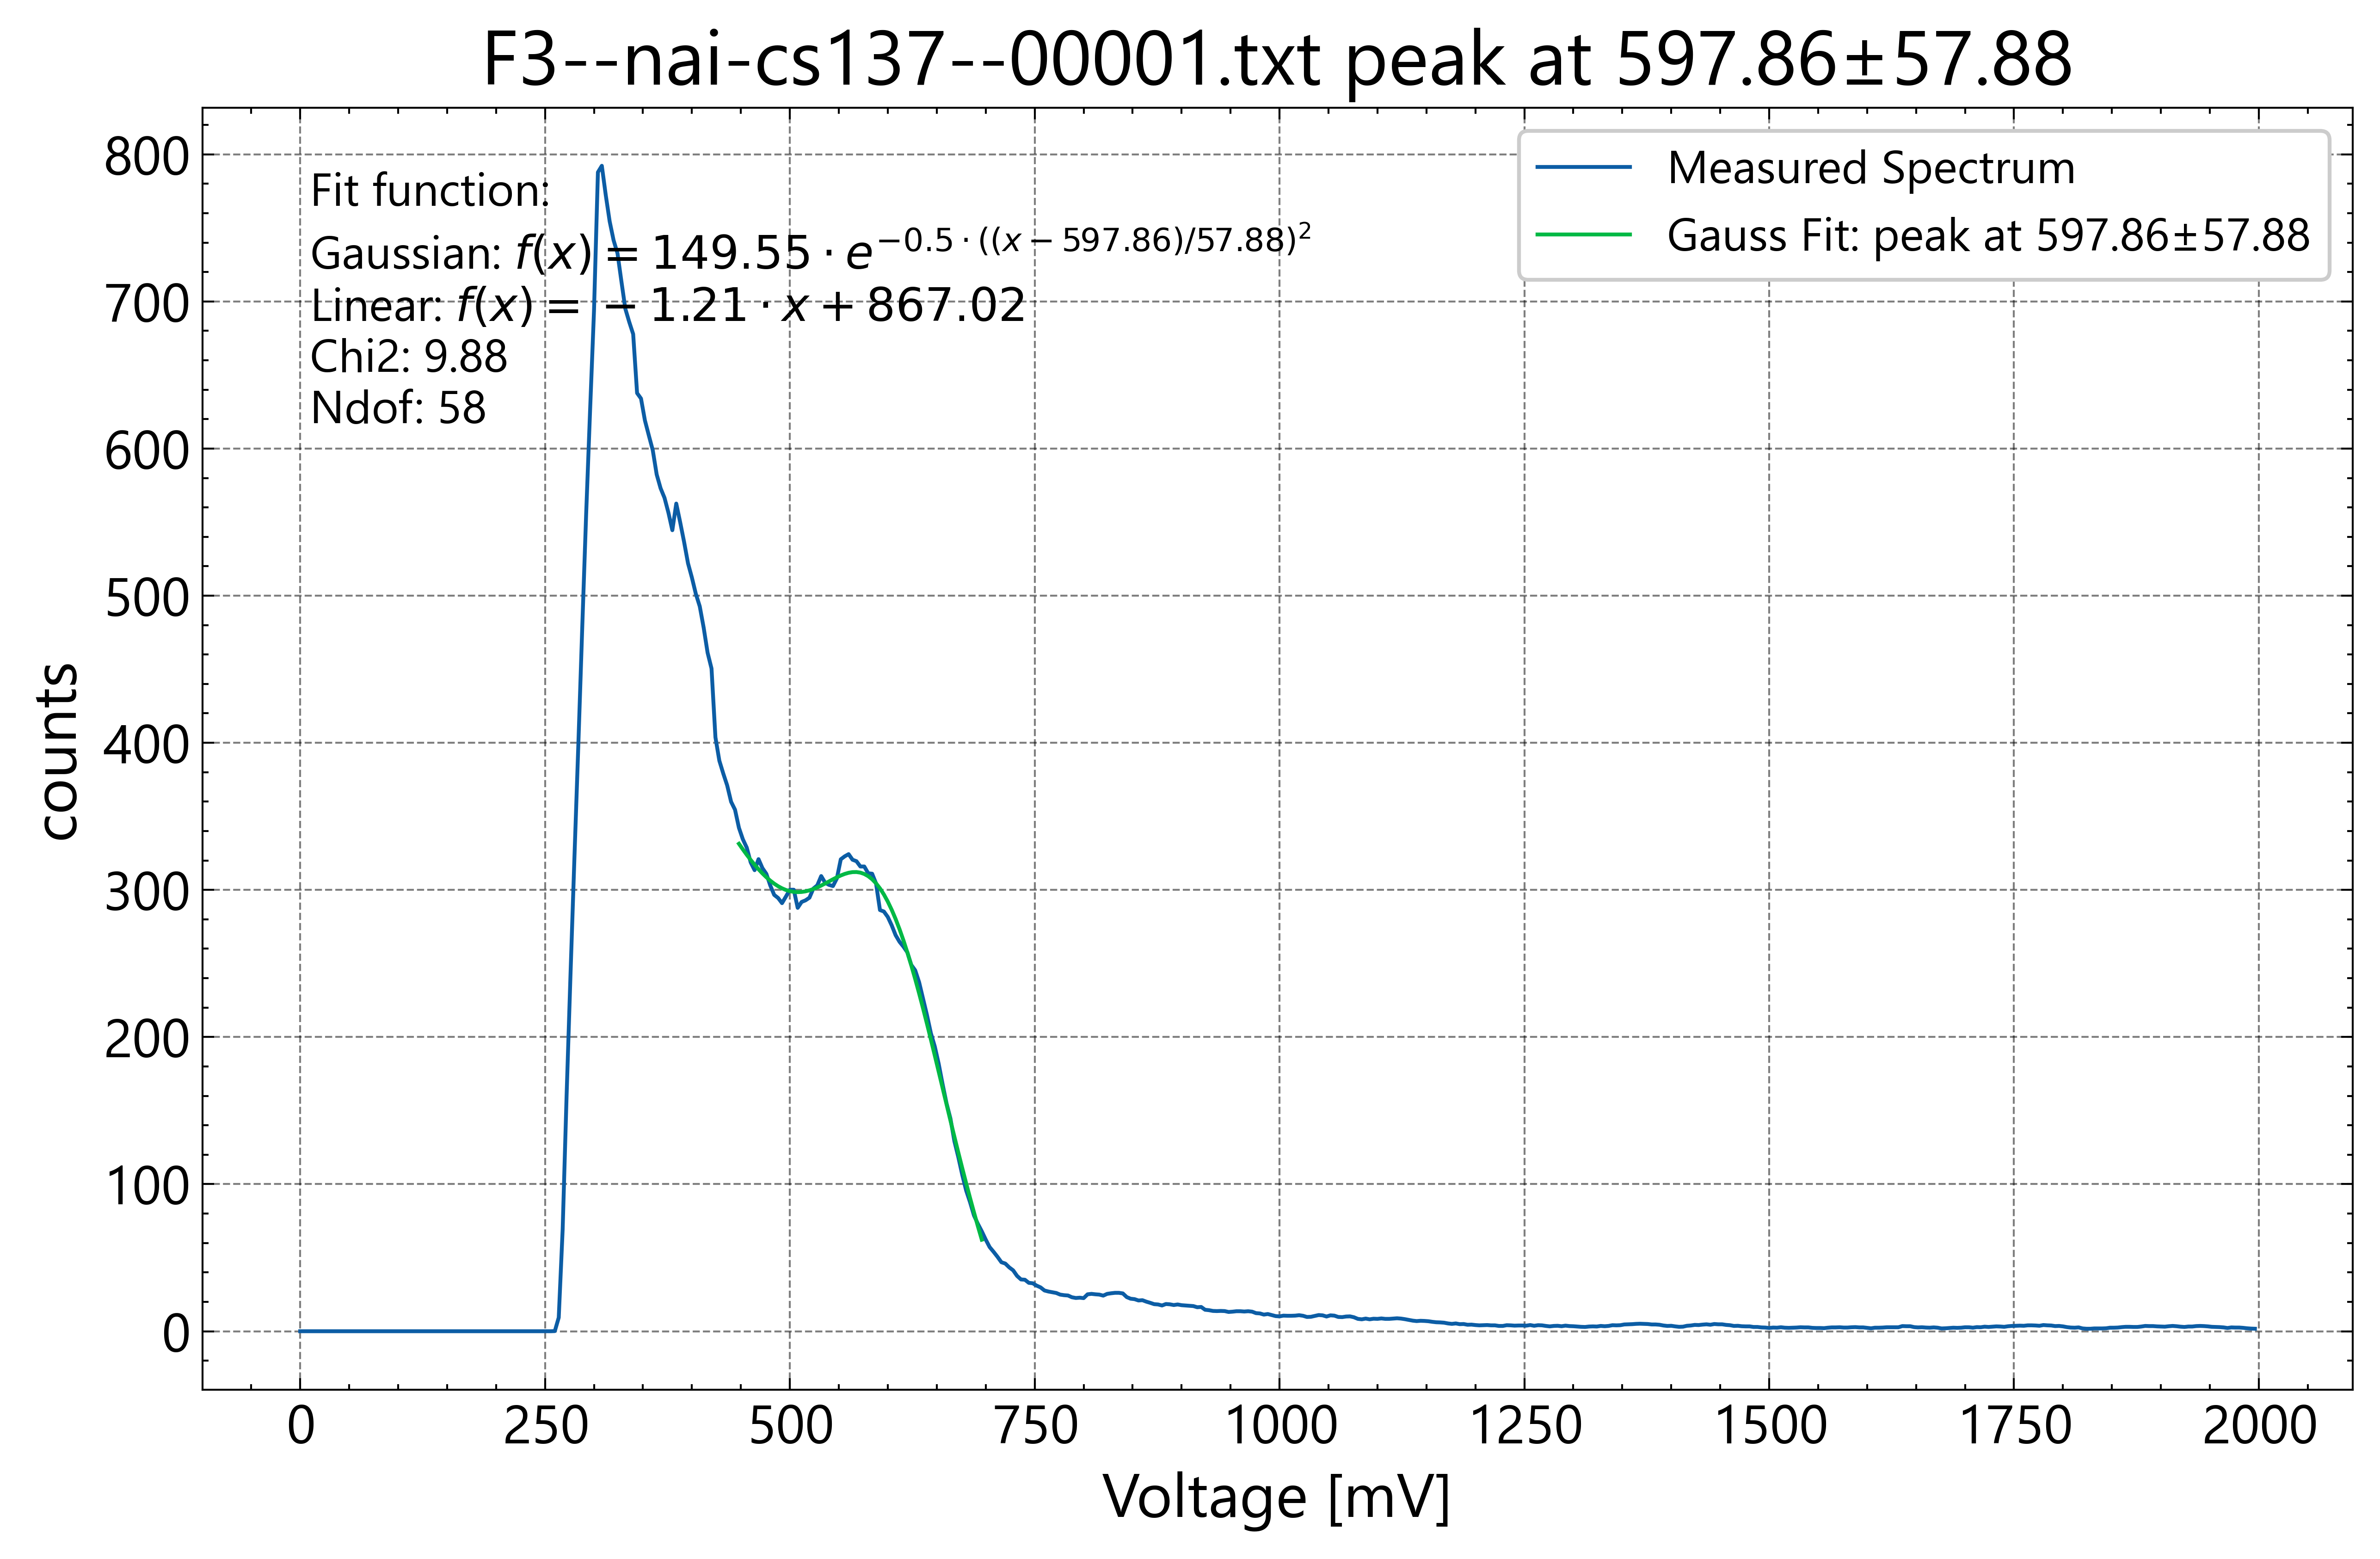

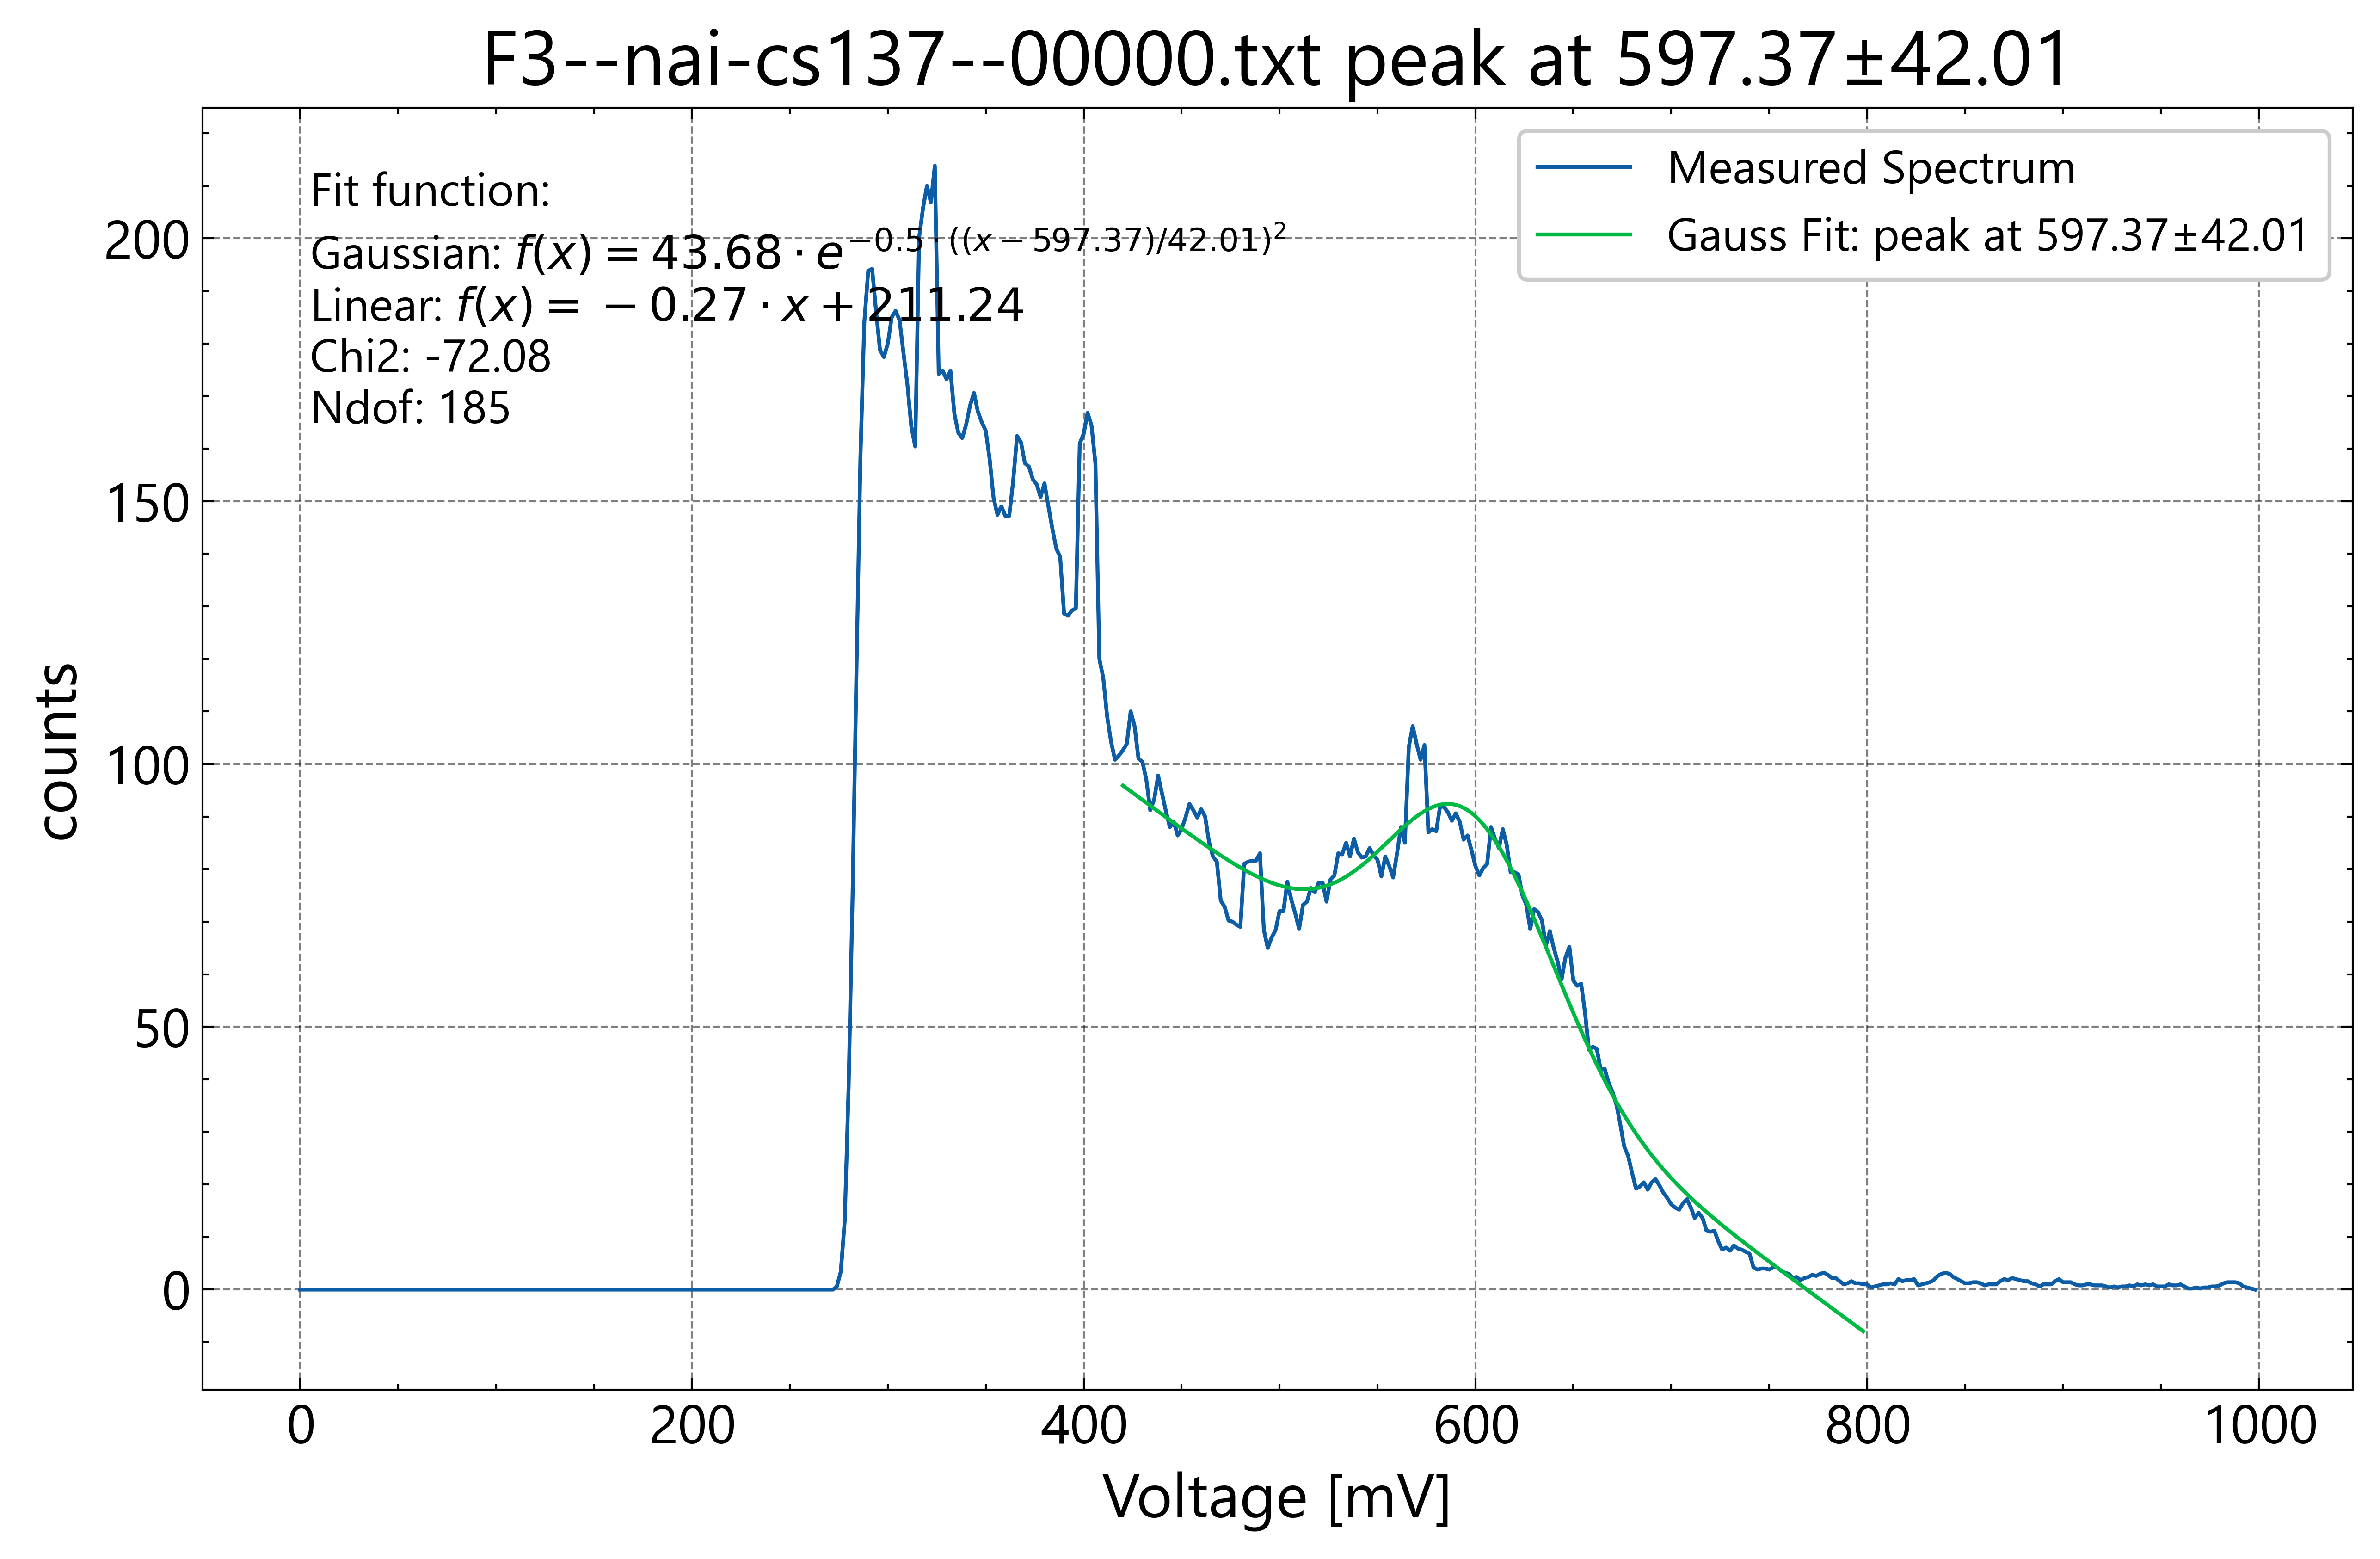

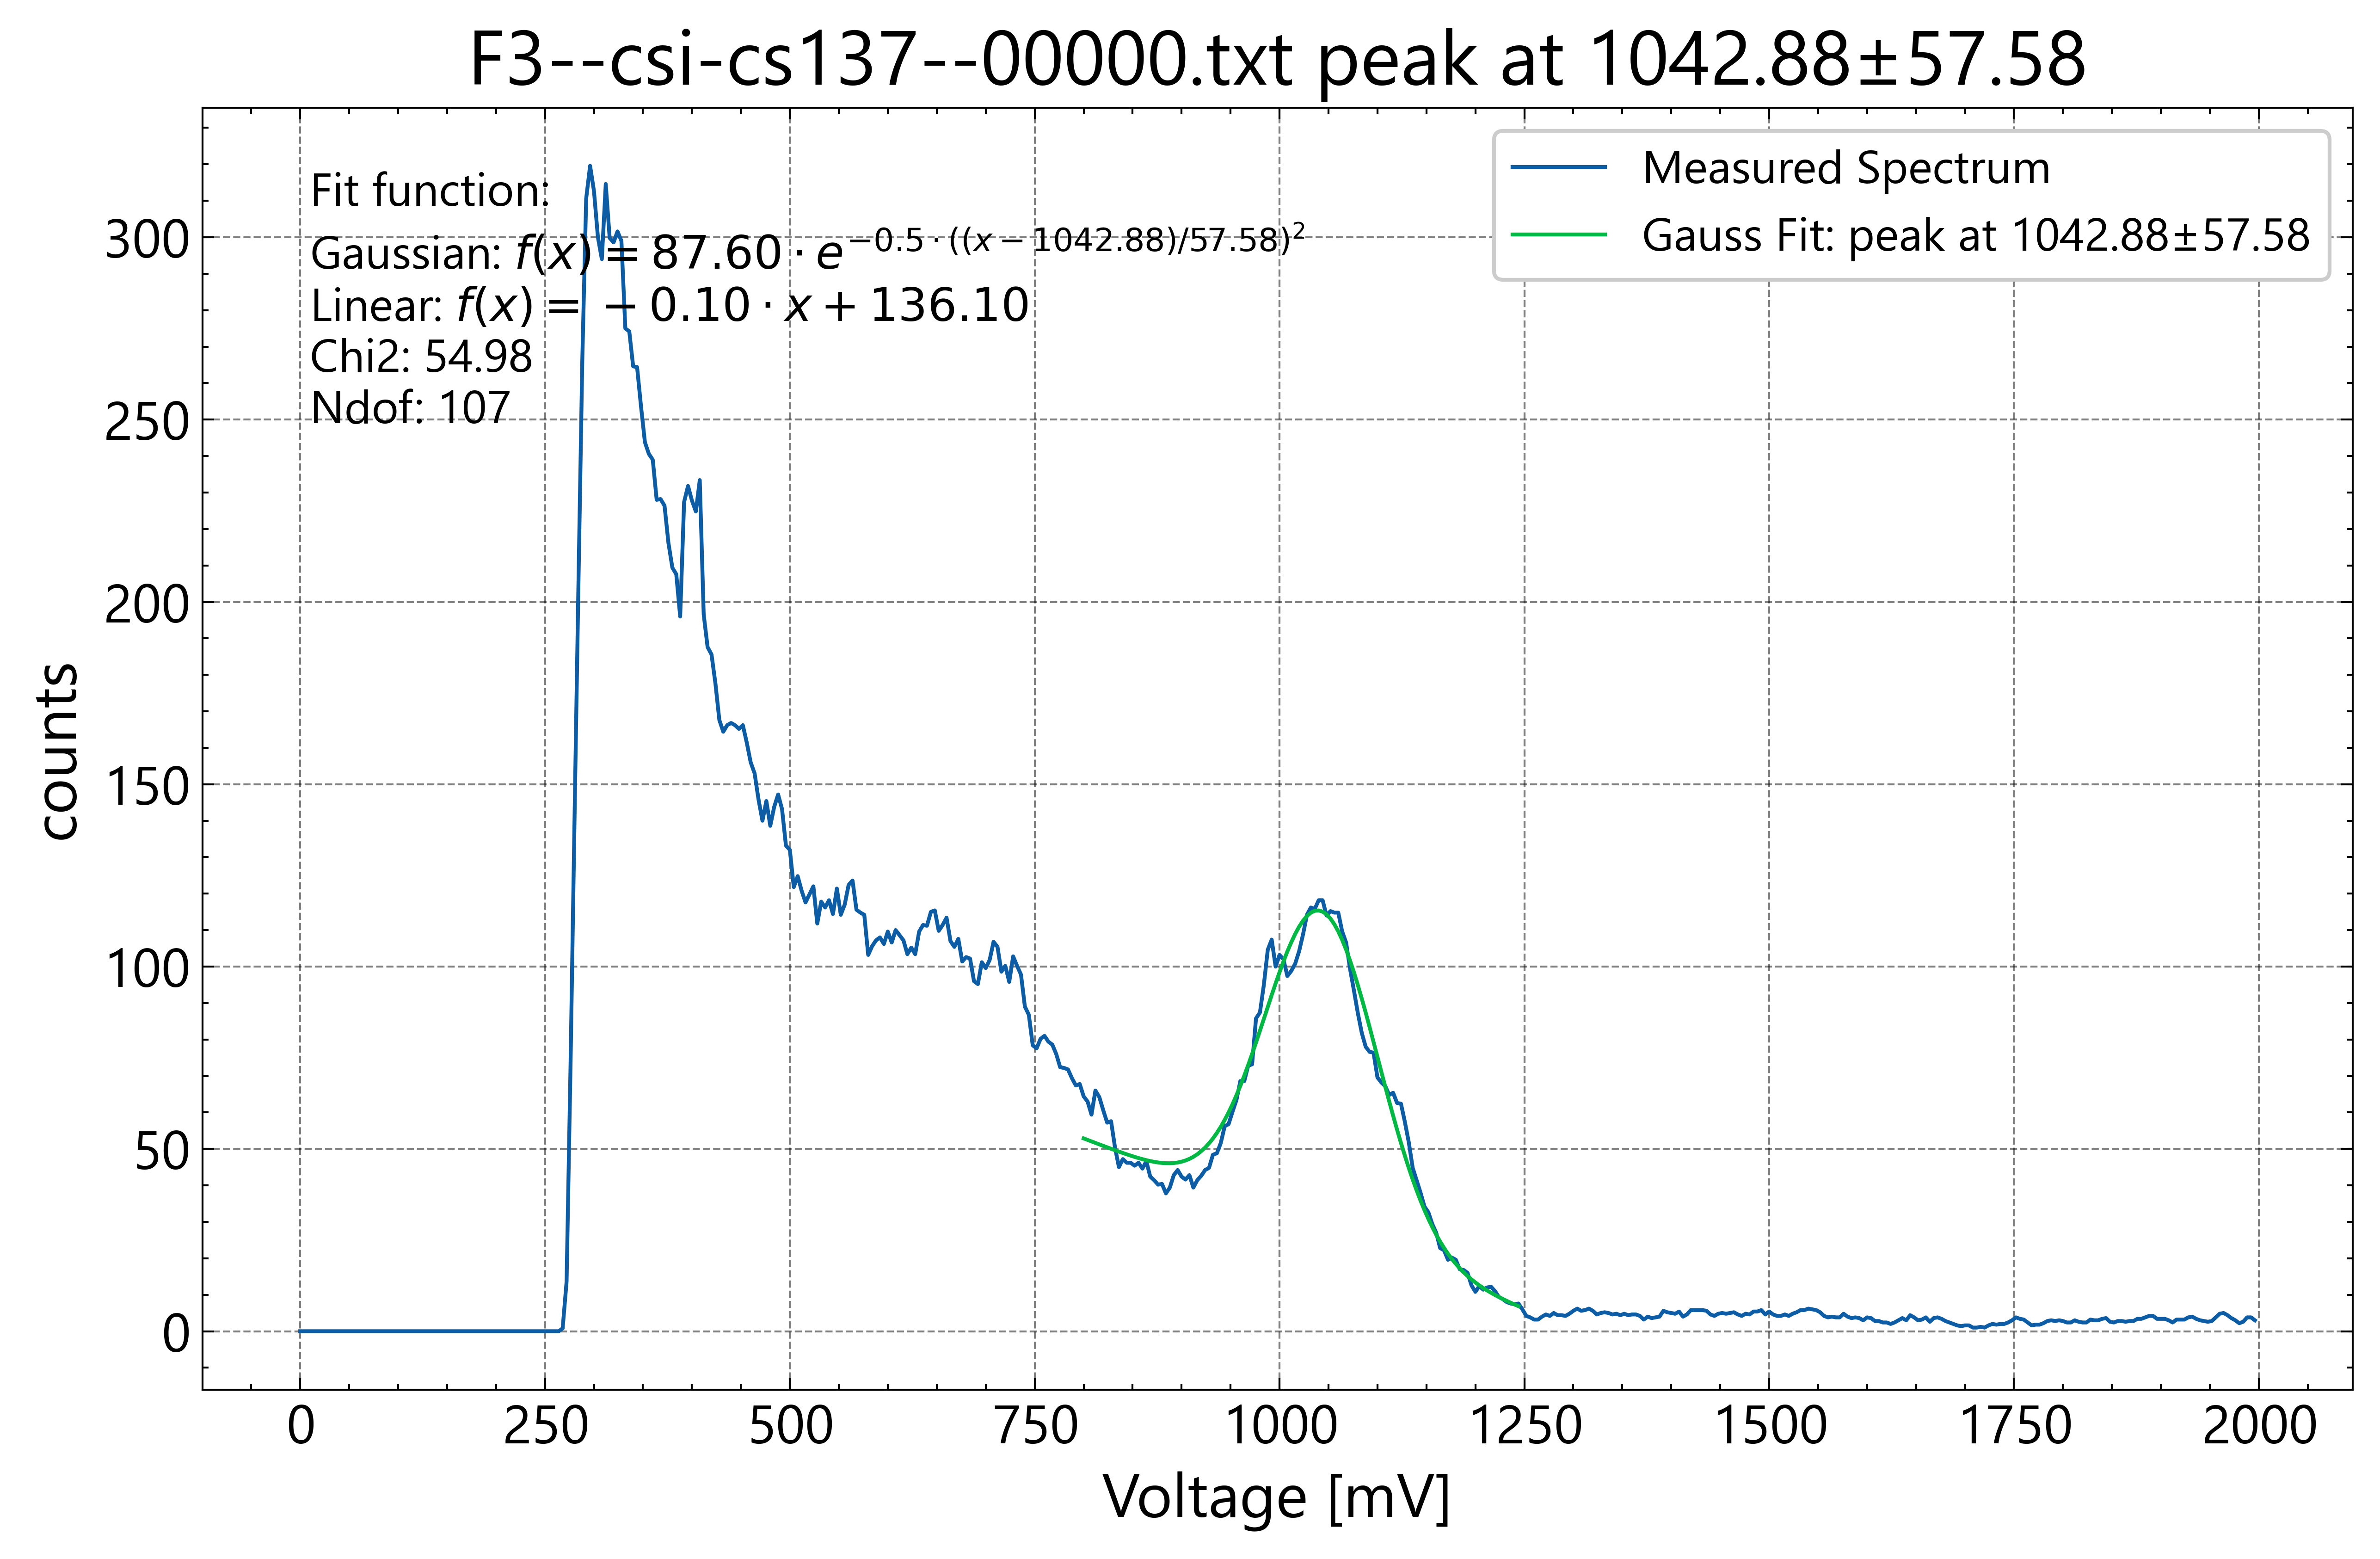

(array([ 8.76009813e+01,  1.04288451e+03,  5.75795581e+01, -1.04042905e-01,
         1.36103454e+02]),
 array([1.51828296, 1.13748794, 1.36423578, 0.0046418 , 4.63645844]))

In [40]:
import os
import glob
from MyScienceTools.modules import *

data = SpectrumAnalyzer(r'标准样品\F3--nai-cs137--00001.txt',filter_window=10)
data.fit_peak([450,700],[200, 550,150/2.355, -1.4, 1500])

data = SpectrumAnalyzer(r'标准样品\F3--nai-cs137--00000.txt',filter_window=5)
data.fit_peak([420,800],[200, 550,150/2.355, -1.4, 1500])

data = SpectrumAnalyzer(r'标准样品\F3--csi-cs137--00000.txt',filter_window=5)
data.fit_peak([800,1250],[200, 1100,150/2.355, -1.4, 50])


In [49]:
# 没有硅脂

peak_Am241 = 1667
peak_662_NaI = 597.8
peak_662_CsI = 1042.88

print(f'light yield of NaI = {59.5E3/3.67/peak_Am241*peak_662_NaI/QE_SiPIN_NaI/0.662} cts/MeV')
print(f'light yield of CsI = {59.5E3/3.67/peak_Am241*peak_662_CsI/QE_SiPIN_CsI/0.662} cts/MeV')

light yield of NaI = 13181.542105247821 cts/MeV
light yield of CsI = 18762.887937087973 cts/MeV


In [53]:
187/131.

1.4274809160305344

### PMT实验

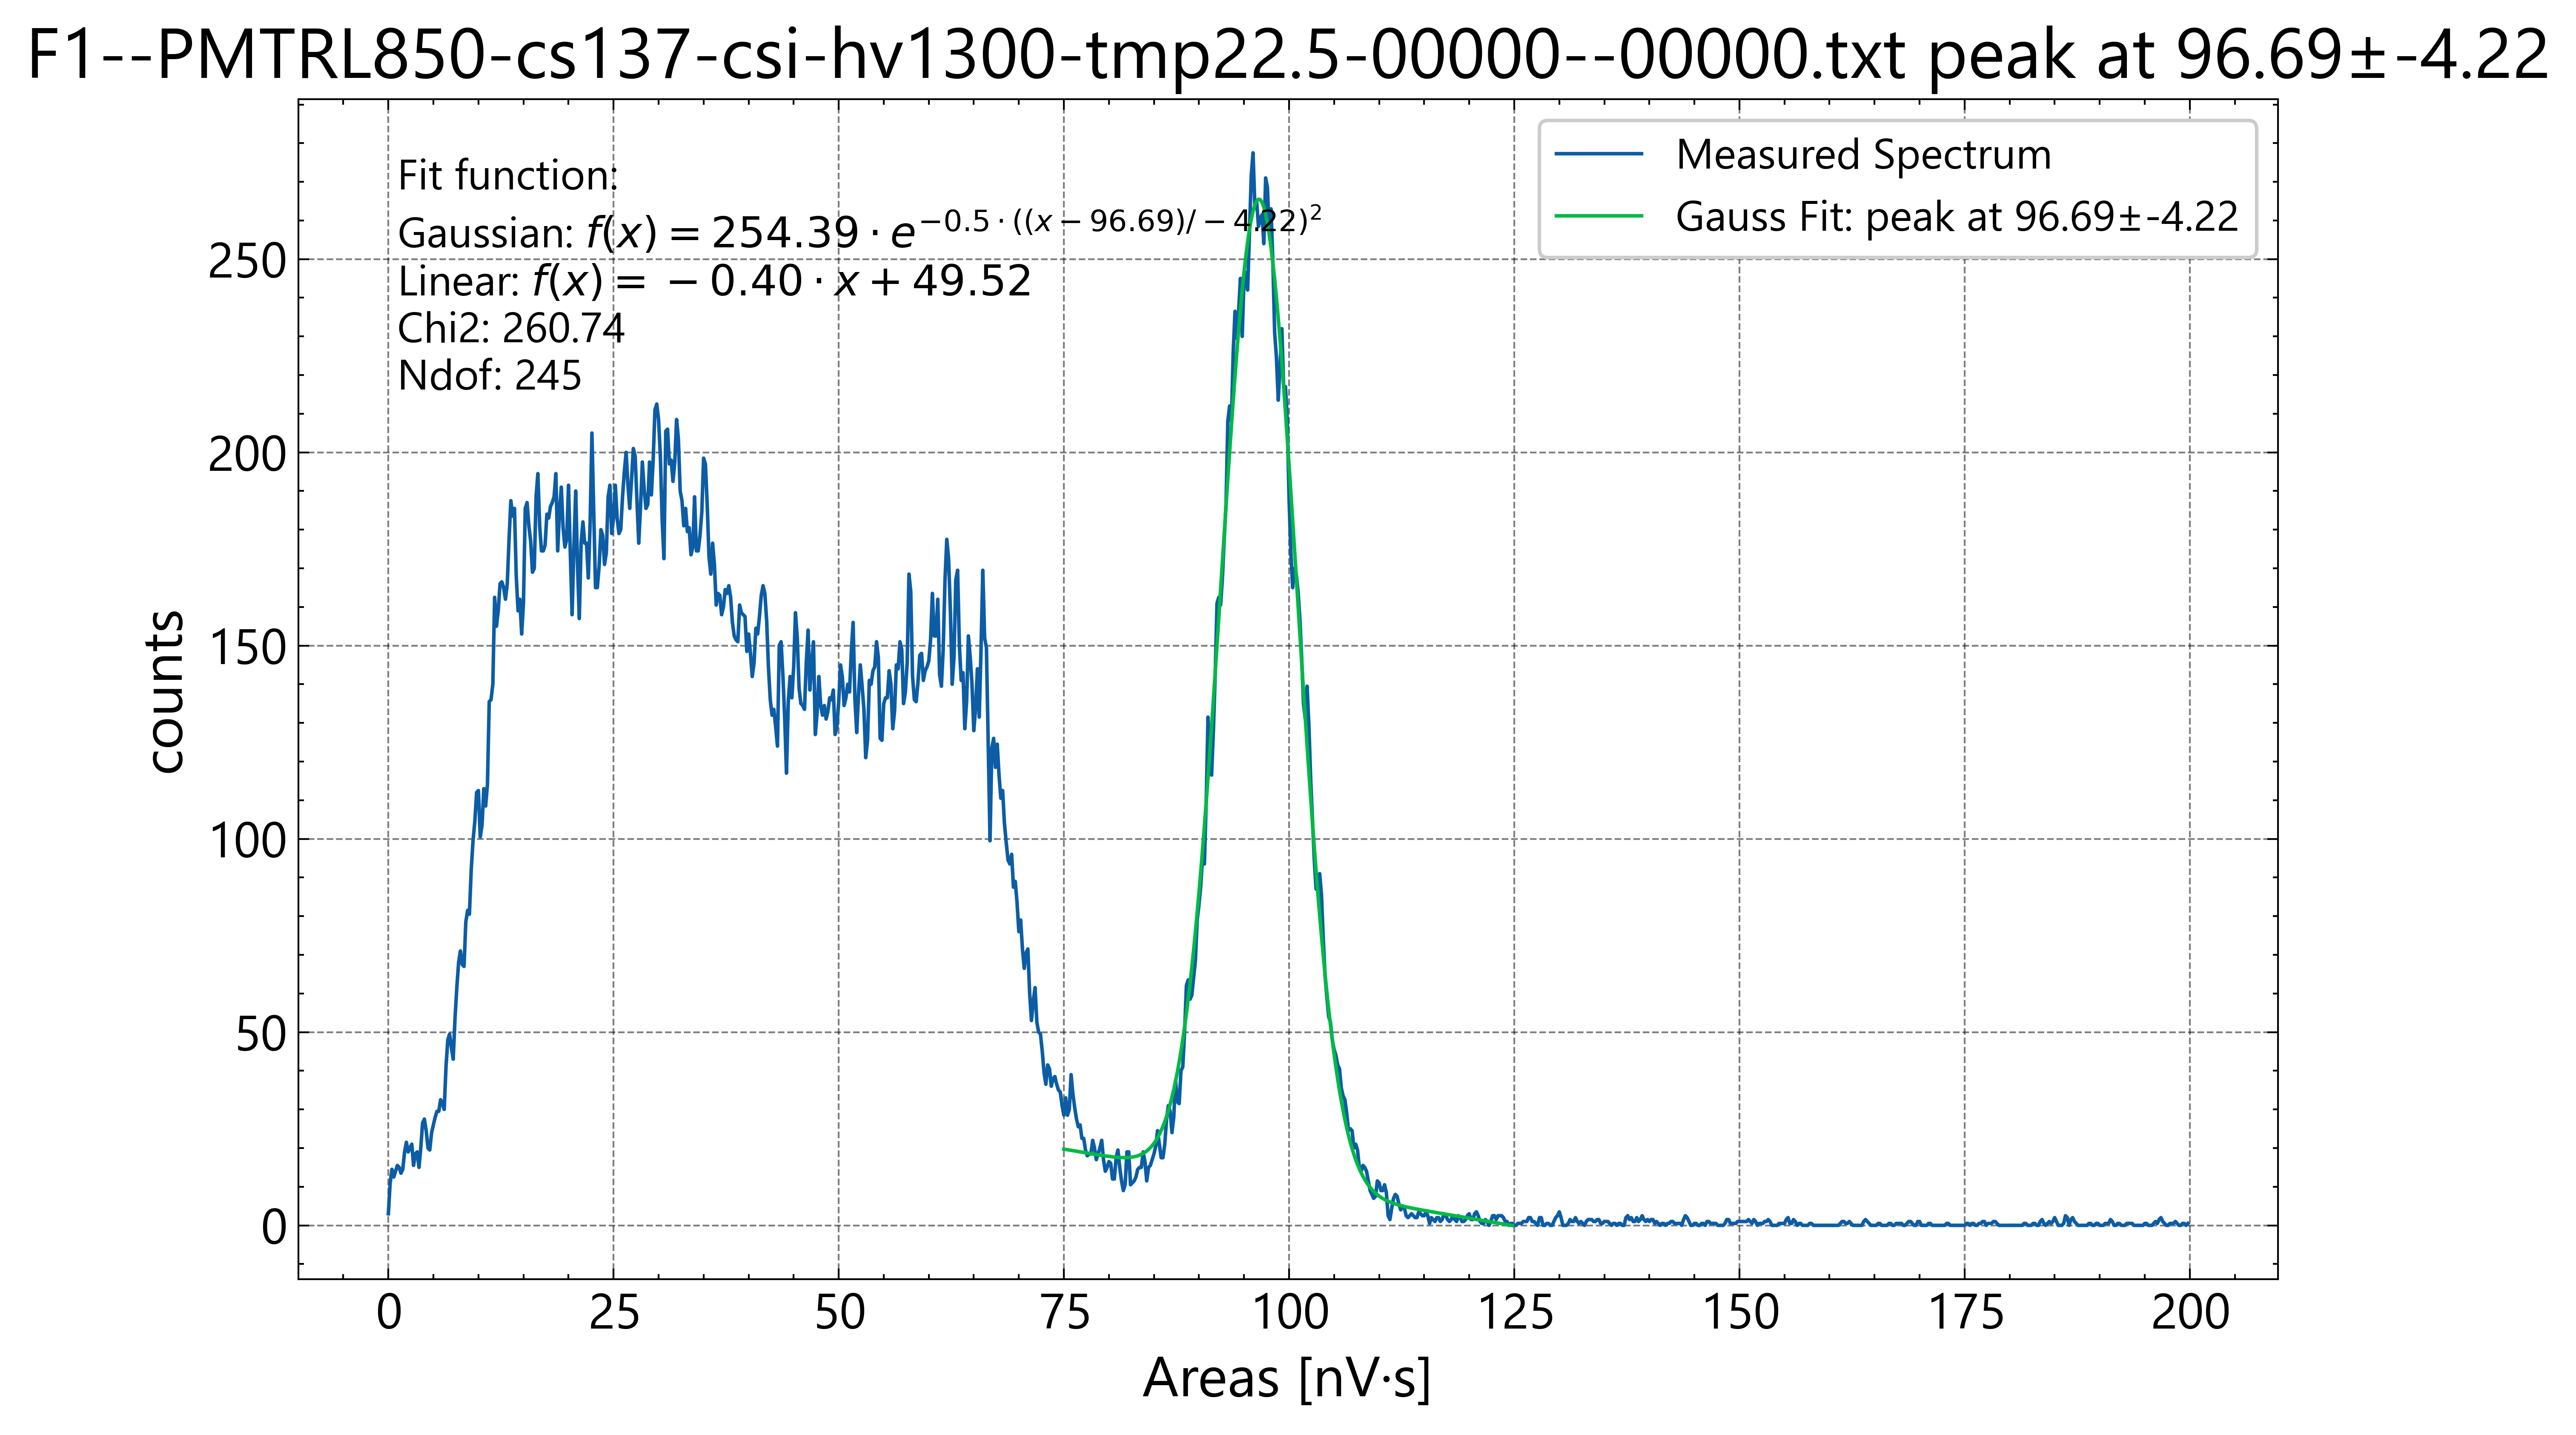

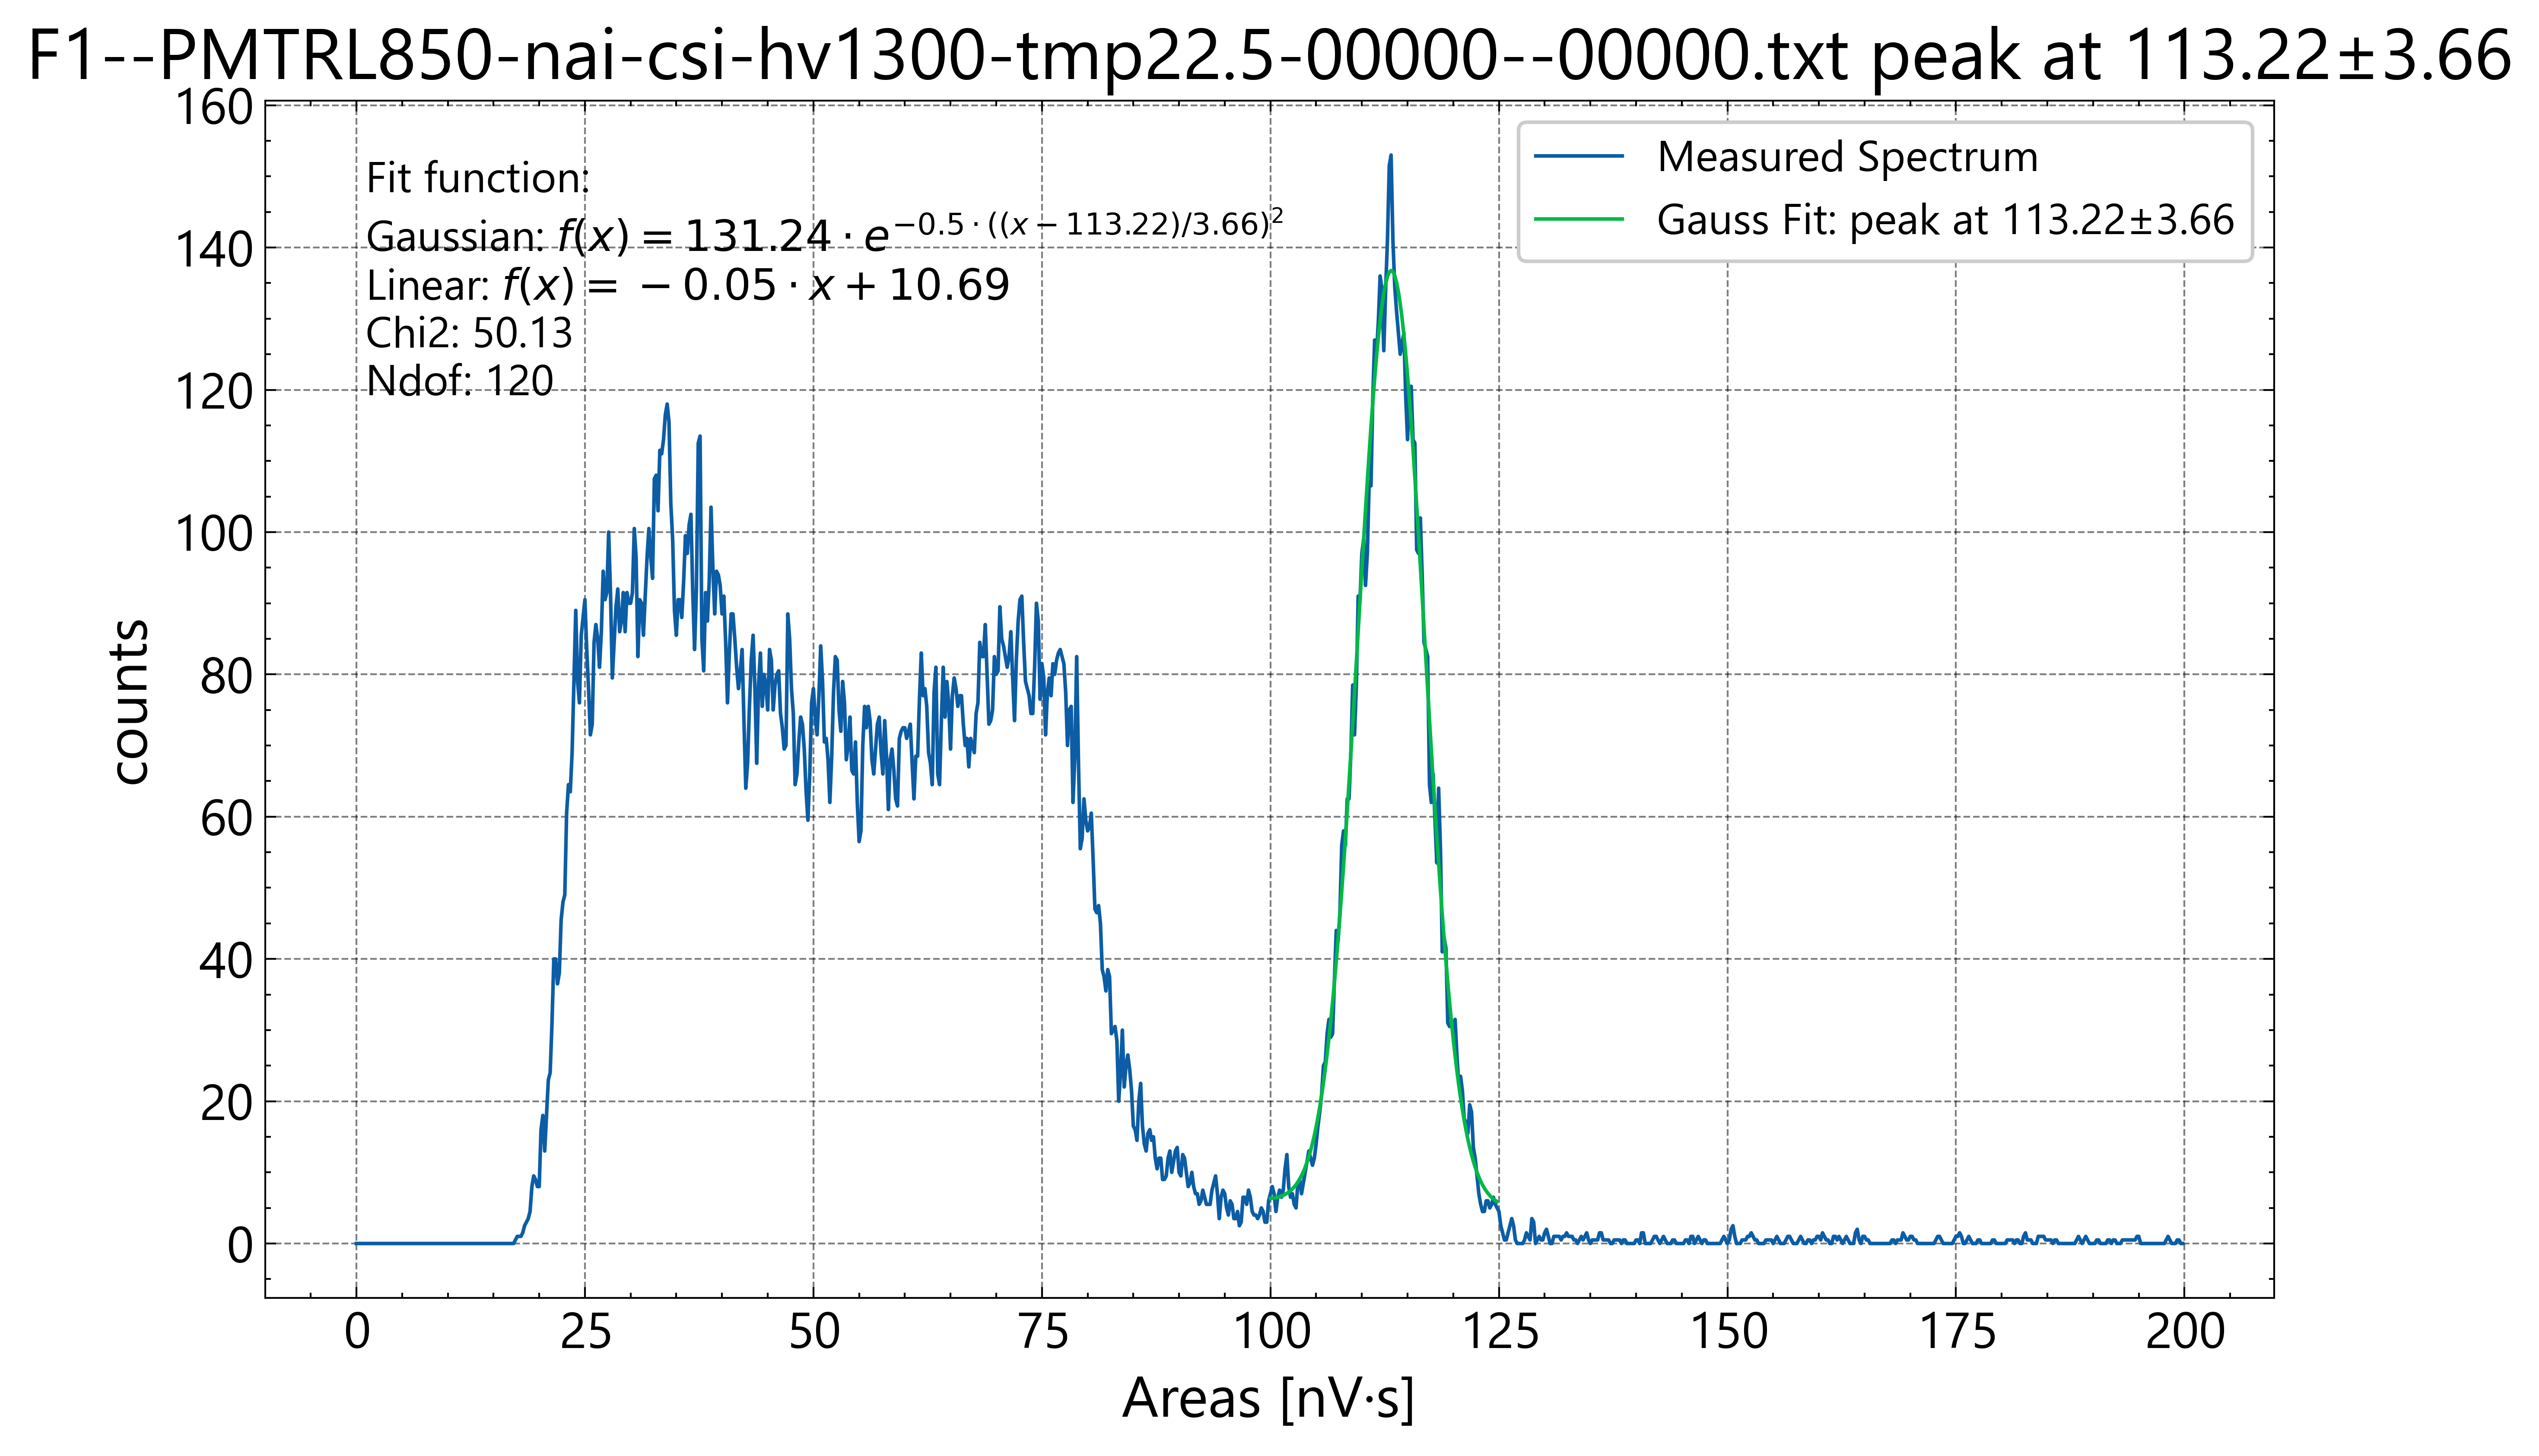

(array([ 1.31239707e+02,  1.13219804e+02,  3.65637617e+00, -4.55661514e-02,
         1.06923629e+01]),
 array([1.1183481 , 0.03542306, 0.04425029, 0.06463409, 7.15021854]))

In [34]:
data = SpectrumAnalyzer(r'标准样品\F1--PMTRL850-cs137-csi-hv1300-tmp22.5-00000--00000.txt',filter_window=2)
data.fit_peak([75,125])

data = SpectrumAnalyzer(r'标准样品\F1--PMTRL850-nai-csi-hv1300-tmp22.5-00000--00000.txt',filter_window=2)
data.fit_peak([100,125])

In [50]:
# 有硅脂
gain = gain_RL850(1300)
PMTpeak_662_NaI = 113.22
PMTpeak_662_CsI = 96.69

print(f'light yield of NaI = {PMTpeak_662_NaI/50*1E-9/1.604E-19/gain/QE_NaI/0.662} cts/MeV')
print(f'light yield of CsI = {PMTpeak_662_CsI/50*1E-9/1.604E-19/gain/QE_CsI/0.662} cts/MeV')

light yield of NaI = 19986.770724332964 cts/MeV
light yield of CsI = 28048.679374521686 cts/MeV


In [56]:
gain*1.604E-19*50*1E12

24.65485593006227